In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [38]:
df= pd.read_csv('/content/Mall_Customers.csv')

In [39]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


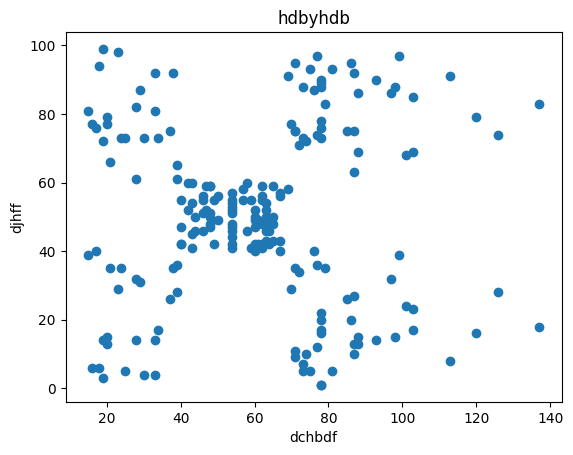

In [42]:
plt.title('hdbyhdb')
plt.xlabel('dchbdf')
plt.ylabel('djhff')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])


In [45]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [49]:
km  = KMeans(n_clusters=3)

In [50]:
km.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [51]:
km.inertia_

106348.37306211119

In [53]:
sse = []
for k in range(1,16):
  km = KMeans(n_clusters=k)
  km.fit_predict(x)
  sse.append(km.inertia_)

In [54]:
sse

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38788.45862332113,
 34692.33302795602,
 26090.360284422874,
 21862.09267218289,
 20474.59202584855,
 18586.93286037635,
 16456.232228920195,
 14448.367534908703,
 13316.847686450972,
 13653.685285948513]

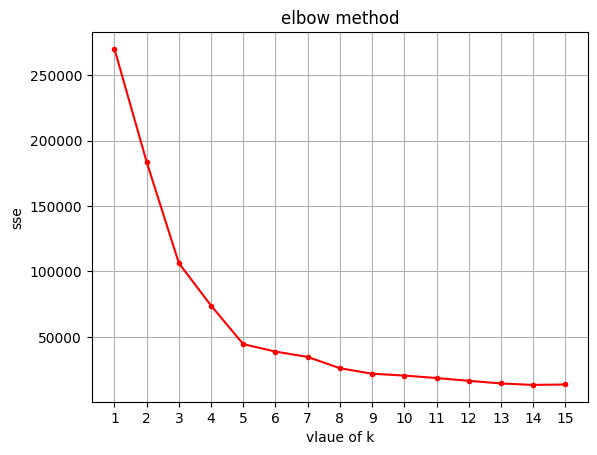

In [57]:
plt.title('elbow method')
plt.xlabel('vlaue of k')
plt.ylabel('sse')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse,marker='.',color='r')



In [61]:
from sklearn.metrics import silhouette_score


In [60]:
silh = []
for k in range(2,16):
  km = KMeans(n_clusters=k)
  labels = km.fit_predict(x)
  score = silhouette_score(x,labels)
  silh.append(score)

In [62]:
silh

[0.28622678604047447,
 0.46761358158775435,
 0.4937945814354117,
 0.553931997444648,
 0.5375812731362782,
 0.5270287298101395,
 0.4395174000782553,
 0.45789851963934397,
 0.4467994806509373,
 0.43062144450638884,
 0.44251469221994305,
 0.43158874687718546,
 0.41202941648874064,
 0.41354645614470587]

<BarContainer object of 14 artists>

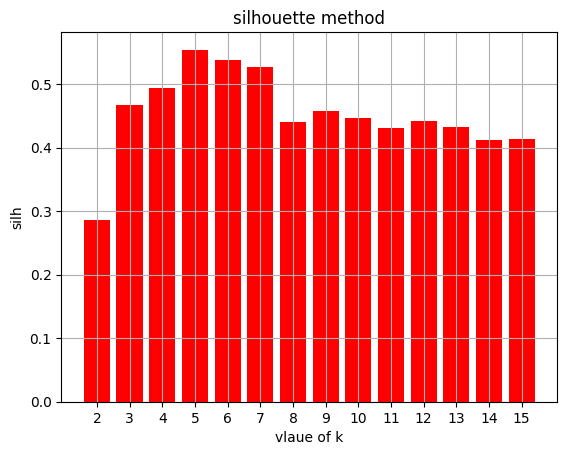

In [65]:
plt.title('silhouette method')
plt.xlabel('vlaue of k')
plt.ylabel('silh')
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16), silh,color='r')


In [68]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x)
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

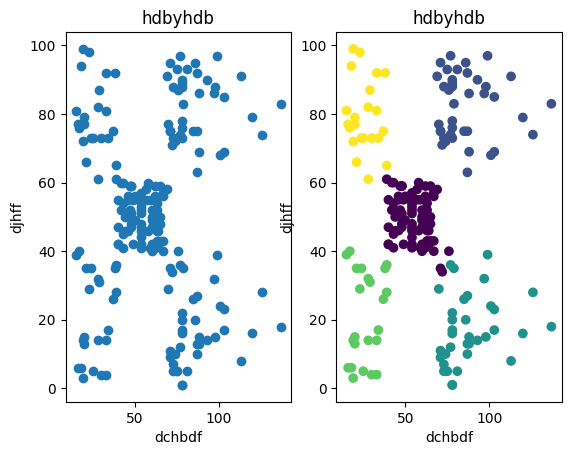

In [75]:
plt.subplot(1,2,1)
plt.title('hdbyhdb')
plt.xlabel('dchbdf')
plt.ylabel('djhff')
plt.scatter(x['Annual Income (k$)'], x['Spending Score (1-100)'])

plt.subplot(1,2,2)
plt.title('hdbyhdb')
plt.xlabel('dchbdf')
plt.ylabel('djhff')
plt.scatter(x['Annual Income (k$)'] , x['Spending Score (1-100)'],
            c=labels)

In [76]:
km.inertia_

44448.45544793369

In [77]:
km.labels_


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)